In [1]:
from iFRAPpy import ExperimentGroup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

<Figure size 432x288 with 0 Axes>

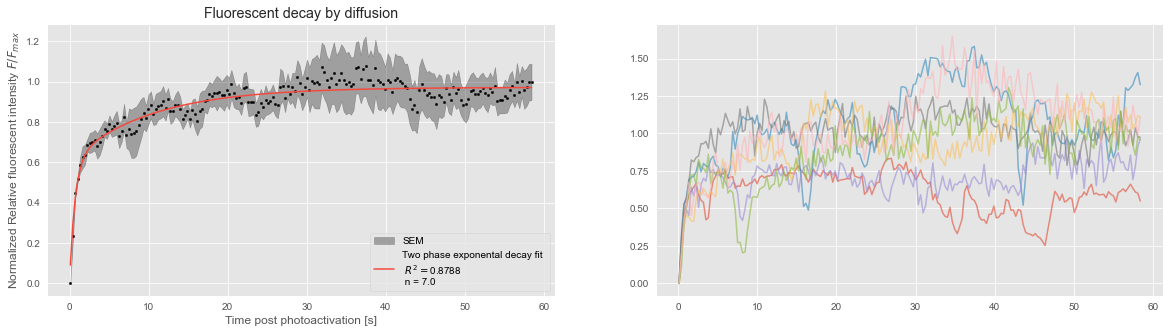

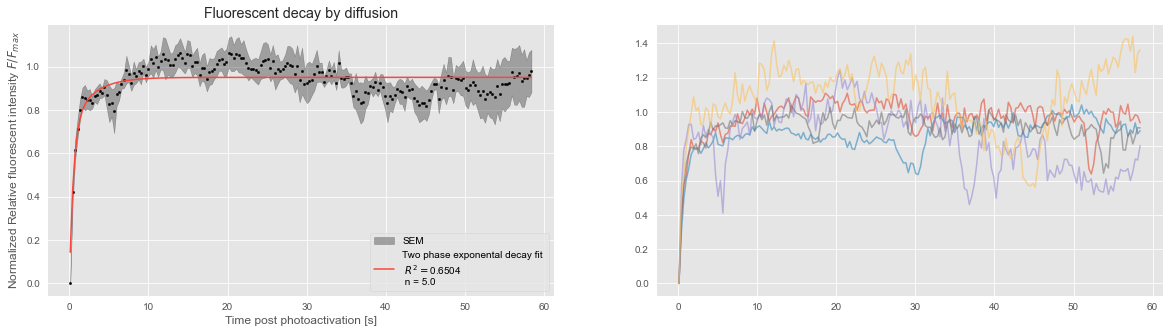

In [2]:
frap = ExperimentGroup('/Volumes/HELHEIM/analyzed_data/diffusivity/')
hyper10 = frap.add_experiment('Vasa(AA1-164)', 10, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_hypergerm/10hpf',
                              molecular_weight=44.25506, disorder=1)
hyper24 = frap.add_experiment('Vasa(AA1-164)', 24, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_hypergerm/24hpf',
                              molecular_weight=44.25506, disorder=1)

In [3]:
#TODO Develop boxplot+scatter plot for both ways
#TODO Develop the data acquisition and build into the plots that are anyways created (same data input structure)


In [4]:
def boxes_and_dots(axes, data_dict, number_cutoff=10, p_distance_cutoff=0.03, colors=None):

    # Data preprocessing

    for idx, [tag, data] in enumerate(data_dict.items()):
        data.sort
        len_data = len(data)

        distance_cutoff = (data[-1]-data[0])*p_distance_cutoff

        data_dict.keys()

        too_close = False
        diff_y_data = [abs(j-i) for i, j in zip(data[:-1], data[1:])]
        for q in diff_y_data:
            if not too_close and q < distance_cutoff:
                too_close = True



        if len_data <= number_cutoff and not too_close:
            scattervalue = 0
        elif len_data <= number_cutoff and too_close:
            scattervalue = 0.025
        elif number_cutoff < len_data < number_cutoff*2:
            scattervalue = 0.025
        elif len_data > number_cutoff*2:
            scattervalue = 0.04
        center = idx+1
        x_values = np.random.uniform(low=center-scattervalue,high=center+scattervalue, size=len(data))
        data_dict.update({tag :  [data, x_values, center]})

    # colors = ["#001219","#005f73","#0a9396","#94d2bd","#e9d8a6","#ee9b00","#ca6702","#bb3e03","#ae2012","#9b2226"]
    colors = ["#ffb3b3","#ffc28a","#f3dd6d","#92c57d","#9bac8b","#698c86","#366b81","#405373","#4a3a64"]
    #Refactor values
    dict_values = list(data_dict.values())
    y_datas = [series[0] for series in dict_values]
    y_labels = list(data_dict.keys())
    x_datas = [series[1] for series in dict_values]
    centers = [series[2] for series in dict_values]

    # Plot on given axes
    boxplot = plt.boxplot(y_datas, labels=y_labels)#, ax=axes) # patch_artist=True,
                           # medianprops = dict(color = "red")) #patch_artist=True,
    # for patch, color in zip(boxplot['boxes'], colors):
    #     patch.set_facecolor(color)
    for x,y in zip(x_datas, y_datas):
        sns.swarmplot(y=y_datas, x=x_datas, s=5, color='#16191d', ax=axes)
        # TODO implement seaborns swarmplots (maybe use sns for both box- and scatterplot)

In [5]:
def swarmy_boxes(axes, data_dict, colors=None):
    df = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in data_dict.items()]))
    if colors is None:
        colors = ["#ffb3b3","#ffc28a","#f3dd6d","#92c57d","#9bac8b","#698c86","#366b81","#405373","#4a3a64"]

    sns.boxplot(data=df, ax=axes, fliersize=0, palette=colors)
    sns.swarmplot(data=df, ax=axes, color='#22262a', s=4)

In [6]:
 #frap is then replaced with self

In [8]:
some_exp = exp_dict['Vasa(AA1-164) 10hpf'][2]

In [17]:
d_data = some_exp.fit_parameters_per_experiment

In [57]:
def per_experiment_values(self, category, triagery=None):
    exp_dict = self.dict_experiments
    try:
        triagery = exp_dict.keys() if triagery is None else triagery
    except:
        triagery = exp_dict.keys()
    dict_for_df = {}
    for k,v in exp_dict.items():
        if k in triagery:
            experiment = v[2].fit_parameters_per_experiment
            data = experiment.loc[category]
            dict_for_df.update({
                k : data.values
            })
    dframe = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in dict_for_df.items()]))

    return dframe


Conclusion: with a dotsize of 15 a distance of 2-3% is enough to distinguish the dots

In [58]:
some_dict = {
    'baka' : [0,1,2,3,4,5,6,],
    'mitai' : [11,10,9,8,7,6,5,4,3],
    'dame' : [2,4,6,8,10,12,51,45,2,5,22,11],
    'dane' : [22,24,26,28,30,22,1,5]
}

AttributeError: 'ExperimentGroup' object has no attribute 'swarmy_boxes'

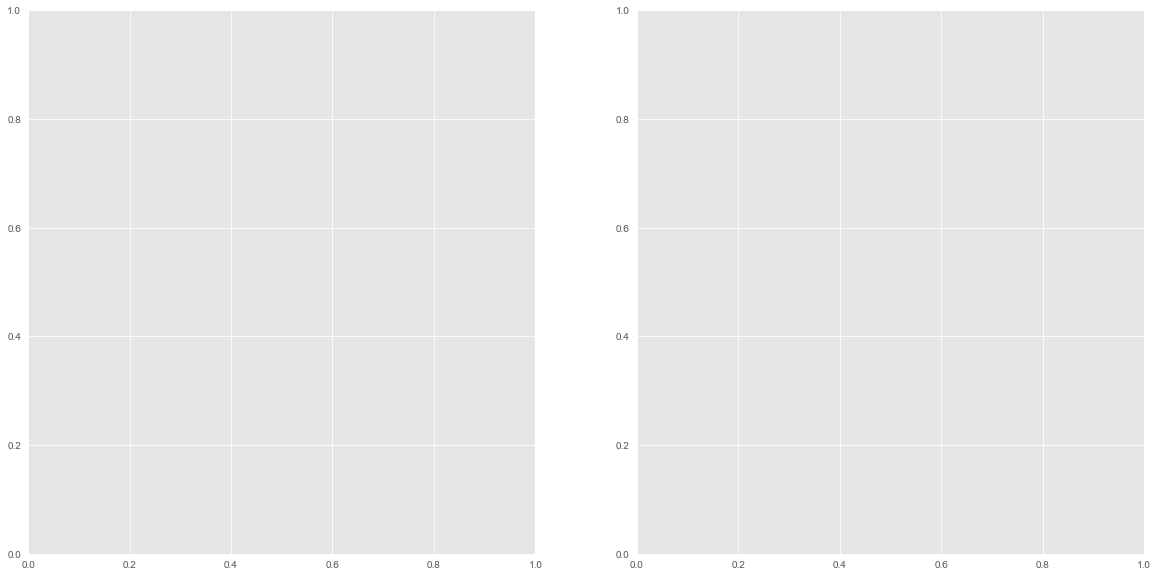

In [3]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
frap.swarmy_boxes(ax[1], per_experiment_values(frap, 'tau fast'))
frap.swarmy_boxes(ax[0], per_experiment_values(frap, 'tau slow'))